In [1]:
import numpy as np
from visualizacao import *
from Preprocessamento import *
from Fusoes import *

2024-11-27 15:05:10.042936: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-27 15:05:10.056865: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-27 15:05:10.060821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-27 15:05:10.070930: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-27 15:05:10.980875: W tensorflow/compiler/tf2

PUC

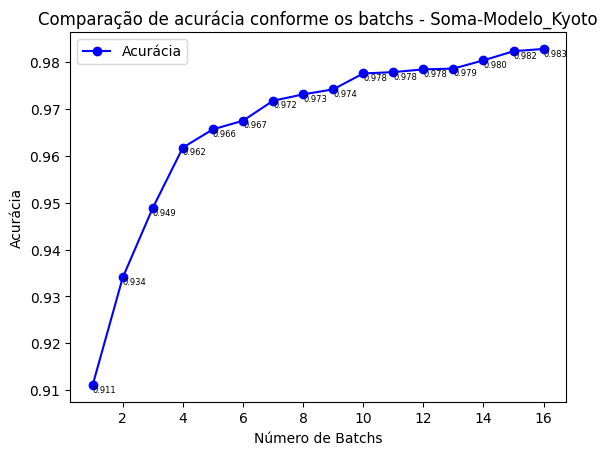

In [2]:
soma = regra_soma('Modelo_Kyoto', 'PUC')

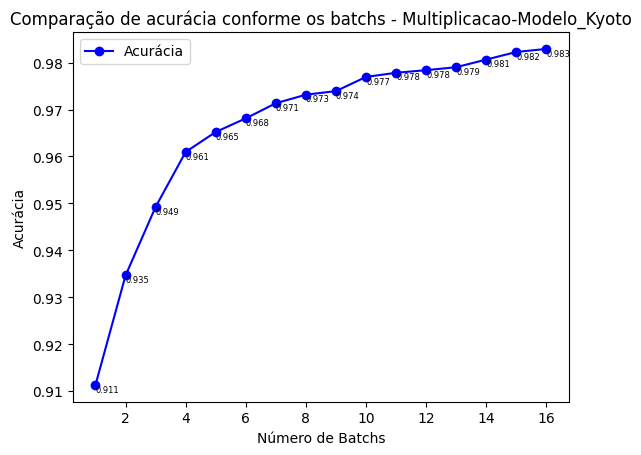

In [3]:
mult = regra_multiplicacao('Modelo_Kyoto', 'PUC')

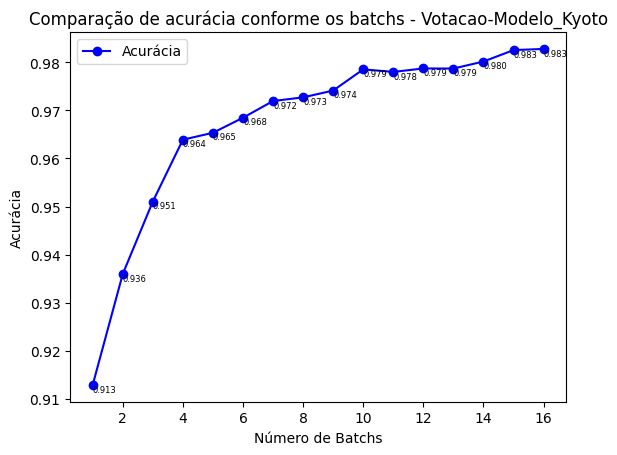

In [4]:
voto = regra_votacao('Modelo_Kyoto', 'PUC')

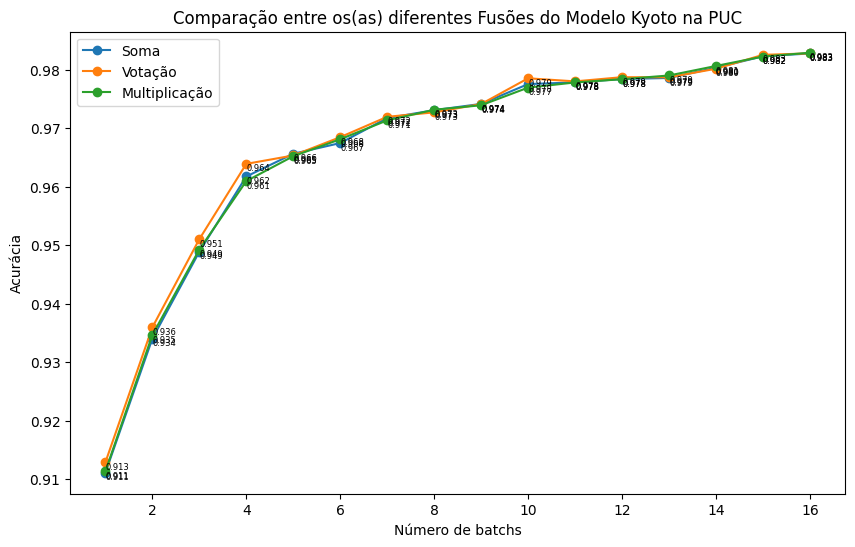

In [5]:
comparacao((soma, voto, mult), nome_modelo='Fusões do Modelo Kyoto na PUC')

UFPR04

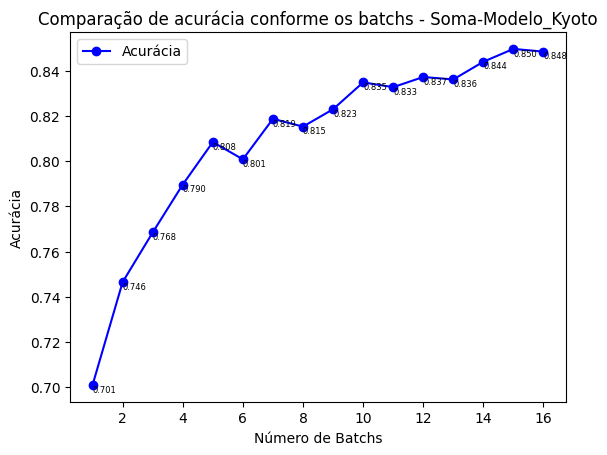

In [6]:
soma = regra_soma('Modelo_Kyoto', 'UFPR04')

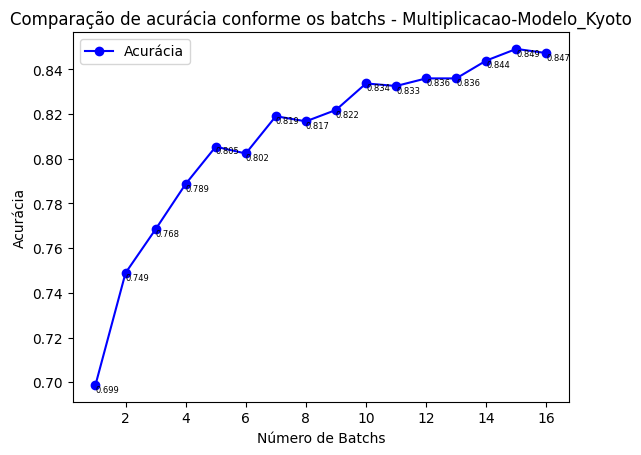

In [7]:
mult = regra_multiplicacao('Modelo_Kyoto', 'UFPR04')

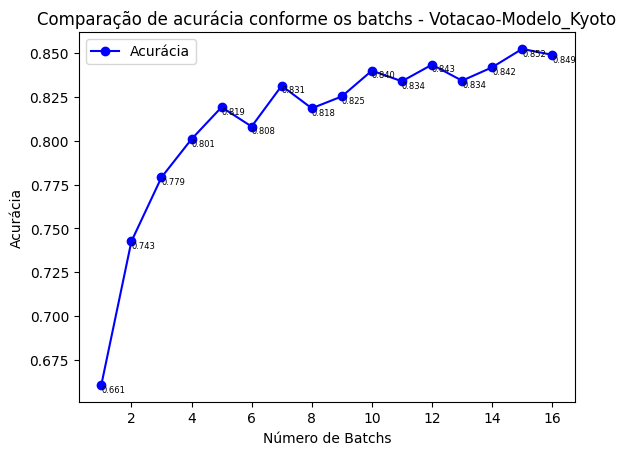

In [8]:
voto = regra_votacao('Modelo_Kyoto', 'UFPR04')

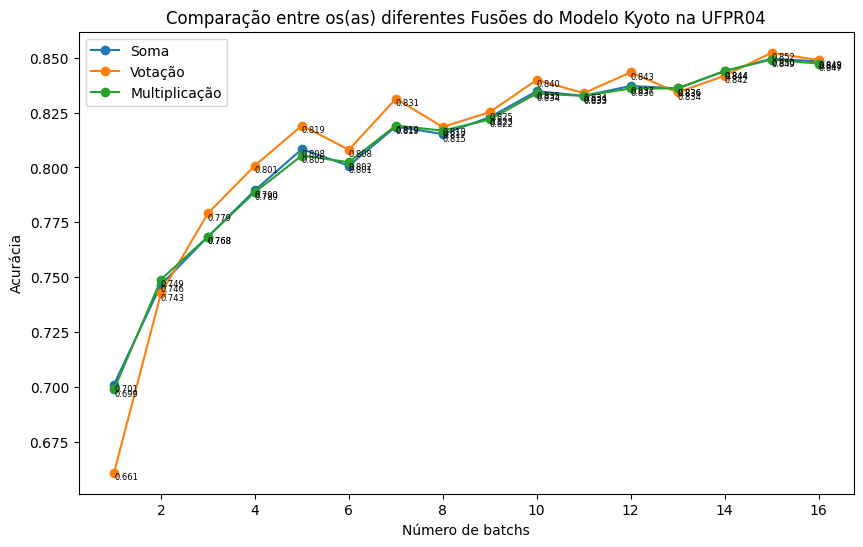

In [9]:
comparacao((soma, voto, mult), nome_modelo='Fusões do Modelo Kyoto na UFPR04')

UFPR05

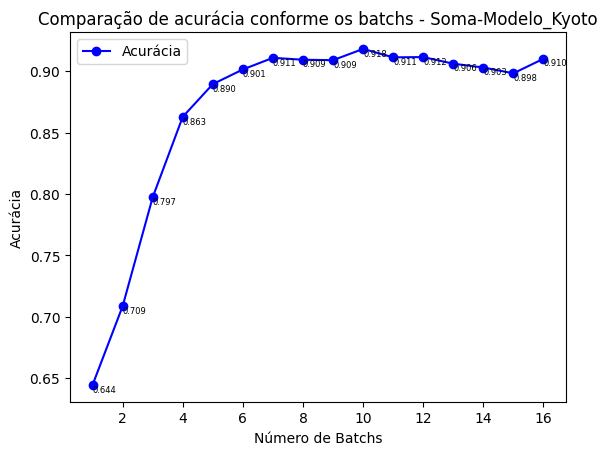

In [10]:
soma = regra_soma('Modelo_Kyoto', 'UFPR05')

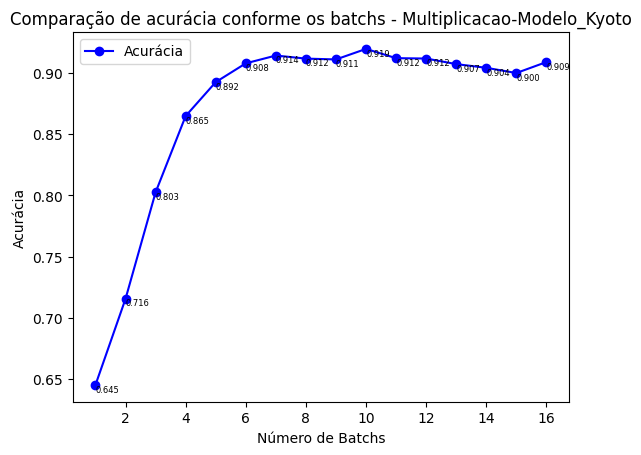

In [11]:
mult = regra_multiplicacao('Modelo_Kyoto', 'UFPR05')

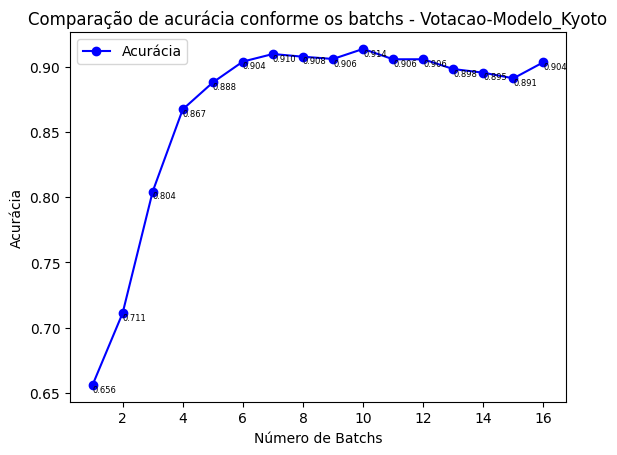

In [12]:
voto = regra_votacao('Modelo_Kyoto', 'UFPR05')

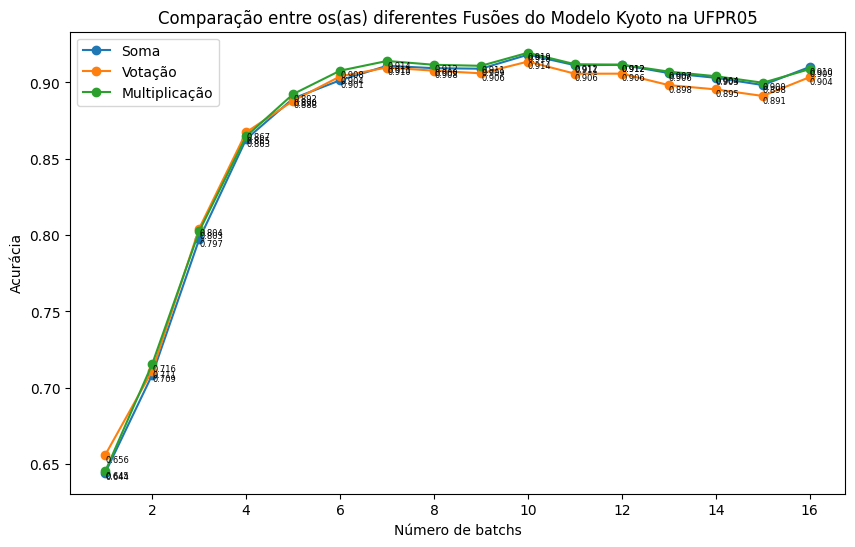

In [13]:
comparacao((soma, voto, mult), nome_modelo='Fusões do Modelo Kyoto na UFPR05')